In [0]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/niravjdn/Software-Measurement-Project/master/data/pit/io/mutations.csv', error_bad_lines=False, names = ["Class", "Package", "gc1", "gc2","gc3","Coverage","gc4"])

In [27]:
df.head()

,Class,Package,gc1,gc2,gc3,Coverage,gc4
0,FileUtils.java,org.apache.commons.io.FileUtils,org.pitest.mutationtest.engine.gregor.mutators...,byteCountToDisplaySize,422,KILLED,org.apache.commons.io.FileUtilsTestCase.testBy...
1,FileUtils.java,org.apache.commons.io.FileUtils,org.pitest.mutationtest.engine.gregor.mutators...,byteCountToDisplaySize,388,KILLED,org.apache.commons.io.FileUtilsTestCase.testBy...
2,FileUtils.java,org.apache.commons.io.FileUtils,org.pitest.mutationtest.engine.gregor.mutators...,byteCountToDisplaySize,390,KILLED,org.apache.commons.io.FileUtilsTestCase.testBy...
3,FileUtils.java,org.apache.commons.io.FileUtils,org.pitest.mutationtest.engine.gregor.mutators...,byteCountToDisplaySize,392,KILLED,org.apache.commons.io.FileUtilsTestCase.testBy...
4,FileUtils.java,org.apache.commons.io.FileUtils,org.pitest.mutationtest.engine.gregor.mutators...,byteCountToDisplaySize,394,KILLED,org.apache.commons.io.FileUtilsTestCase.testBy...


In [28]:
df.drop('gc1', axis=1, inplace=True)
df.drop('gc2', axis=1, inplace=True)
df.drop('gc3', axis=1, inplace=True)
df.drop('gc4', axis=1, inplace=True)
df['Package'] = df['Package'].map(lambda x: str(x)[:x.rfind('.')])
df['Package'] = df['Package'].map(lambda x:  x if (x.find('$')+1 == 0) else  x[:x.find('$')+1] )
df['Class'] = df['Class'].map(lambda x: str(x)[:x.rfind('.java')])
df.rename(columns={'Class':'CLASS',
                          'Package':'PACKAGE'},
                 inplace=True)
df.head()


,CLASS,PACKAGE,Coverage
0,FileUtils,org.apache.commons.io,KILLED
1,FileUtils,org.apache.commons.io,KILLED
2,FileUtils,org.apache.commons.io,KILLED
3,FileUtils,org.apache.commons.io,KILLED
4,FileUtils,org.apache.commons.io,KILLED


In [29]:
df = df.groupby(['CLASS','PACKAGE','Coverage'],as_index = False).size().unstack(fill_value=0)
df.head()

,Coverage,KILLED,NO_COVERAGE,SURVIVED,TIMED_OUT
CLASS,PACKAGE,,,,
AbstractFileComparator,org.apache.commons.io.comparator,7,0,0,0
AbstractFileFilter,org.apache.commons.io.filefilter,3,0,0,0
AgeFileFilter,org.apache.commons.io.filefilter,4,0,1,0
AndFileFilter,org.apache.commons.io.filefilter,19,1,5,0
AppendableOutputStream,org.apache.commons.io.output,1,0,0,0


In [30]:
#Not MEMORY_ERROR
df['Total_Mutant'] =  (df['KILLED'] + df['NO_COVERAGE'] + df['SURVIVED'] + df['TIMED_OUT'])
df['Mutation_Score'] =  ((df['KILLED']+df['TIMED_OUT']) / df['Total_Mutant'])*100
print('Total Mutants  '+str(df.Total_Mutant.sum()))


Total Mutants  3243


In [31]:
print('Total Killed  '+str(df.KILLED.sum()+df.TIMED_OUT.sum()))

Total Killed  2666


In [32]:
print('Total TIMED_OUT  '+str(df.TIMED_OUT.sum()))

Total TIMED_OUT  68


In [33]:
print('Mutation Score  '+str((df.KILLED.sum()/df.Total_Mutant.sum())*100))
#df.reset_index()
#df.columns.tolist()

Mutation Score  80.11100832562443


In [34]:
df.to_csv('data.csv')
from google.colab import files
#files.download("data.csv")
df = pd.read_csv('data.csv', error_bad_lines=False)
df.head()


,CLASS,PACKAGE,KILLED,NO_COVERAGE,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score
0,AbstractFileComparator,org.apache.commons.io.comparator,7,0,0,0,7,100.0
1,AbstractFileFilter,org.apache.commons.io.filefilter,3,0,0,0,3,100.0
2,AgeFileFilter,org.apache.commons.io.filefilter,4,0,1,0,5,80.0
3,AndFileFilter,org.apache.commons.io.filefilter,19,1,5,0,25,76.0
4,AppendableOutputStream,org.apache.commons.io.output,1,0,0,0,1,100.0


In [35]:
df.count()

CLASS             103
PACKAGE           103
KILLED            103
NO_COVERAGE       103
SURVIVED          103
TIMED_OUT         103
Total_Mutant      103
Mutation_Score    103
dtype: int64

In [36]:
df1 = pd.read_csv('https://raw.githubusercontent.com/niravjdn/Software-Measurement-Project/master/data/jacoco/io/jacoco/jacoco.csv', error_bad_lines=False)
df1['CLASS'] = df1['CLASS'].map(lambda x:  x if (x.find('.')+1 == 0) else  x[:x.find('.')] )
#aggregation_functions = {'price': 'sum', 'amount': 'sum', 'name': 'first'}
df1 = df1.groupby(df1['CLASS']).aggregate(sum).reset_index()
#df1.count()
df1.columns
#df1.head()

Index(['CLASS', 'INSTRUCTION_MISSED', 'INSTRUCTION_COVERED', 'BRANCH_MISSED',
       'BRANCH_COVERED', 'LINE_MISSED', 'LINE_COVERED', 'COMPLEXITY_MISSED',
       'COMPLEXITY_COVERED', 'METHOD_MISSED', 'METHOD_COVERED'],
      dtype='object')

In [0]:
df1['Statement_Percentage'] =  (df1['LINE_COVERED'] / (df1['LINE_COVERED'] + df1['LINE_MISSED'])) * 100

In [0]:
df1['Branch_Percentage'] =  (df1['BRANCH_COVERED'] / (df1['BRANCH_COVERED'] + df1['BRANCH_MISSED'])) * 100

In [39]:
df1['CC'] =  df1['COMPLEXITY_COVERED'] + df1['COMPLEXITY_MISSED'];
df1.CLASS.count()

113

In [40]:
merged_inner = pd.merge(left=df,right=df1, left_on='CLASS', right_on='CLASS')
merged_inner.CLASS.count()

103

In [41]:
df1[(~df1.CLASS.isin(merged_inner.CLASS))&(~df1.CLASS.isin(merged_inner.CLASS))]

,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement_Percentage,Branch_Percentage,CC
9,BrokenInputStream,7,21,0,0,2,8,1,6,1,6,80.000000,NaN,7
10,BrokenOutputStream,7,15,0,0,2,6,1,4,1,4,75.000000,NaN,5
22,CloseShieldInputStream,0,10,0,0,0,4,0,2,0,2,100.000000,NaN,2
23,CloseShieldOutputStream,0,10,0,0,0,4,0,2,0,2,100.000000,NaN,2
25,ClosedOutputStream,0,26,0,0,0,4,0,4,0,4,100.000000,NaN,4
42,FileAlterationListenerAdaptor,0,11,0,0,0,9,0,9,0,9,100.000000,NaN,9
49,FileExistsException,15,4,0,0,4,2,2,1,2,1,33.333333,NaN,3
60,IOExceptionWithCause,4,5,0,0,2,2,1,1,1,1,50.000000,NaN,2
72,NullOutputStream,0,11,0,0,0,5,0,5,0,5,100.000000,NaN,5
97,TailerListenerAdapter,6,3,0,0,6,1,6,1,6,1,14.285714,NaN,7


Difference - Classes not covered in jacoco or PIT

In [42]:
df = merged_inner
df.columns
merged_inner.head()

,CLASS,PACKAGE,KILLED,NO_COVERAGE,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement_Percentage,Branch_Percentage,CC
0,AbstractFileComparator,org.apache.commons.io.comparator,7,0,0,0,7,100.0,0,21,0,4,0,8,0,6,0,4,100.000000,100.000000,6
1,AbstractFileFilter,org.apache.commons.io.filefilter,3,0,0,0,3,100.0,0,22,0,0,0,4,0,4,0,4,100.000000,NaN,4
2,AgeFileFilter,org.apache.commons.io.filefilter,4,0,1,0,5,80.0,0,76,0,6,0,18,0,11,0,8,100.000000,100.000000,11
3,AndFileFilter,org.apache.commons.io.filefilter,19,1,5,0,25,76.0,11,167,2,24,3,43,3,20,1,9,93.478261,92.307692,23
4,AppendableOutputStream,org.apache.commons.io.output,1,0,0,0,1,100.0,0,16,0,0,0,6,0,3,0,3,100.000000,NaN,3


In [43]:
merged_inner.count()

CLASS                   103
PACKAGE                 103
KILLED                  103
NO_COVERAGE             103
SURVIVED                103
TIMED_OUT               103
Total_Mutant            103
Mutation_Score          103
INSTRUCTION_MISSED      103
INSTRUCTION_COVERED     103
BRANCH_MISSED           103
BRANCH_COVERED          103
LINE_MISSED             103
LINE_COVERED            103
COMPLEXITY_MISSED       103
COMPLEXITY_COVERED      103
METHOD_MISSED           103
METHOD_COVERED          103
Statement_Percentage    103
Branch_Percentage        82
CC                      103
dtype: int64

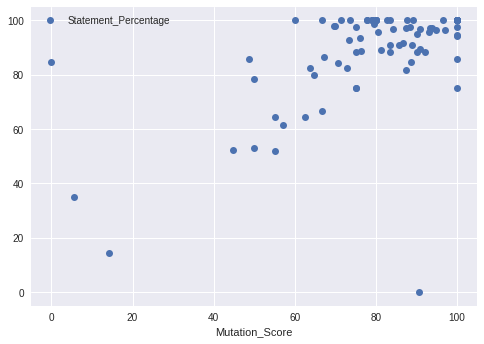

In [44]:
df.plot(x='Mutation_Score', y='Statement_Percentage', style='o')

In [45]:
df[['Mutation_Score','Statement_Percentage']].corr(method ='spearman')

,Mutation_Score,Statement_Percentage
Mutation_Score,1.000000,0.579148
Statement_Percentage,0.579148,1.000000


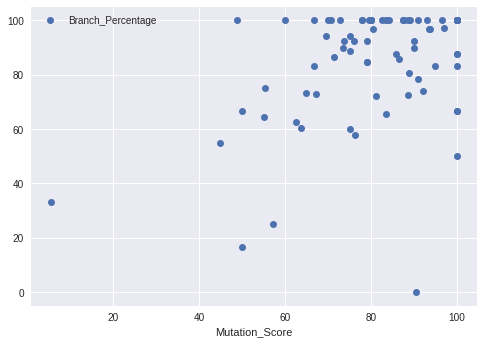

In [46]:
df.plot(x='Mutation_Score', y='Branch_Percentage', style='o')

In [47]:
df[['Mutation_Score','Branch_Percentage']].corr(method ='spearman')

,Mutation_Score,Branch_Percentage
Mutation_Score,1.000000,0.322096
Branch_Percentage,0.322096,1.000000


In [0]:
df.to_csv('io-mu-st-branch.csv')
from google.colab import files
files.download("io-mu-st-branch.csv")